In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.drop(["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Embarked"],axis=1,inplace=True)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [6]:
target=df.Survived
inputs=df.drop('Survived',axis='columns')

In [7]:
dummies=pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [8]:
inputs=pd.concat((inputs,dummies),axis=1)
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [10]:
inputs.drop("Sex",axis=1,inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


In [12]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [13]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [14]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

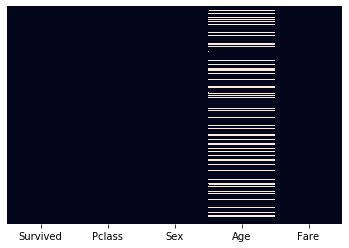

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [19]:
inputs.Age=inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [21]:
inputs.isnull().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [27]:
len(X_train)

712

In [28]:
len(X_test)

179

In [29]:
len(inputs)

891

In [30]:
X_train

,Pclass,Age,Fare,female,male
305,1,0.920000,151.5500,0,1
496,1,54.000000,78.2667,1,0
118,1,24.000000,247.5208,0,1
659,1,58.000000,113.2750,0,1
343,2,25.000000,13.0000,0,1
...,...,...,...,...,...
315,3,26.000000,7.8542,1,0
211,2,35.000000,21.0000,1,0
693,3,25.000000,7.2250,0,1
284,1,29.699118,26.0000,0,1


In [32]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [33]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
model.score(X_test,y_test)

0.8156424581005587

In [35]:
X_test[:10]

,Pclass,Age,Fare,female,male
563,3,29.699118,8.0500,0,1
489,3,9.000000,15.9000,0,1
435,1,14.000000,120.0000,1,0
408,3,21.000000,7.7750,0,1
329,1,16.000000,57.9792,1,0
243,3,22.000000,7.1250,0,1
4,3,35.000000,8.0500,0,1
483,3,63.000000,9.5875,1,0
25,3,38.000000,31.3875,1,0
214,3,29.699118,7.7500,0,1


In [36]:
y_test[:10]

563    0
489    1
435    1
408    0
329    1
243    0
4      0
483    1
25     1
214    0
Name: Survived, dtype: int64

In [37]:
model.predict(X_test[:10])

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [38]:
model.predict_proba(X_test[:10])

array([[9.89093216e-01, 1.09067844e-02],
       [9.82503220e-01, 1.74967796e-02],
       [1.52529808e-04, 9.99847470e-01],
       [9.87192030e-01, 1.28079704e-02],
       [4.00047078e-03, 9.95999529e-01],
       [9.87426716e-01, 1.25732836e-02],
       [9.89778888e-01, 1.02211116e-02],
       [7.94717842e-02, 9.20528216e-01],
       [7.94660256e-02, 9.20533974e-01],
       [9.89078253e-01, 1.09217473e-02]])